# Deskripsi Proyek

# Konteks

Anda adalah seorang analis di sebuah toko daring besar. Anda bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan.
Anda perlu memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya.

# Deskripsi Data

**Data yang digunakan pada bagian pertama proyek**

`/datasets/hypotheses_us.csv`

- `Hypotheses` — deskripsi singkat tentang hipotesis
- `Reach` — jangkauan pengguna, dalam skala satu hingga sepuluh
- `Impact` — dampak terhadap pengguna, dalam skala satu hingga sepuluh
- `Confidence` — keyakinan pada hipotesis, dalam skala satu sampai sepuluh
- `Effort` — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.

**Data yang digunakan pada bagian kedua proyek**

`/datasets/orders_us.csv` 

- `transactionId` — ID pesanan
- `visitorId` — ID pengguna yang membuat pesanan
- `date` — tanggal dibuatnya pesanan
- `revenue` — pendapatan dari pesanan
- `group` — kelompok uji (test group) A/B tempat pengguna berada

`/datasets/visits_us.csv` 

- `date` — tanggal
- `group` — kelompok uji (test group) A/B
- `visits` — jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

Pastikan untuk melakukan pra-pemrosesan data terlebih dahulu. Tidak menutup kemungkinan, dataset asli yang Anda miliki mengandung kesalahan; misalnya, sebagian pengunjung mungkin berada di kelompok A maupun di kelompok B.

**Bagian 1. Memprioritaskan Hipotesis**

File `hypotheses_us.csv` memuat sembilan hipotesis untuk meningkatkan pendapatan toko daring dengan `Reach`, `Impact`, `Confidence`, dan `Effort` yang sudah ditentukan untuk masing-masing hipotesis.
Tugas Anda adalah:

- Menerapkan framework `ICE` untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
- Menerapkan framework `RICE` untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
- Menunjukkan perubahan prioritas hipotesis saat `RICE` diterapkan untuk menggantikan `ICE`. Berikan penjelasan terkait perubahan tersebut.

**Bagian 2. Analisis A/B Testing**

Anda telah melakukan A/B testing dan mendapatkan hasil seperti yang dideskripsikan dalam file `orders_us.csv` dan `visits_us.csv`.

Menganalisis A/B testing:

1. Gambarkan pendapatan kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.
2. Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.
3. Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buatlah kesimpulan dan asumsinya.
4. Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buatlah kesimpulan dan asumsinya.
5. Buatlah diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buatlah kesimpulan dan asumsinya.
6. Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.
7. Buatlah diagram tebar (scatter chart) untuk harga pesanan. Buatlah kesimpulan dan asumsinya.
8. Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.
9. Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.
10. Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.
11. Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.
12. Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.
13. Buatlah keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 3. Melanjutkan pengujian.

## Memprioritaskan Hipotesis

In [1]:
# import library
import pandas as pd
import numpy as np

import datetime
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

### Membuka dan menyiapkan data

#### df_hypothesis

In [2]:
df_hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
df_hypothesis.shape

(9, 5)

In [5]:
df_hypothesis.dtypes

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object

In [6]:
df_hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [7]:
df_hypothesis.columns = df_hypothesis.columns.str.lower()

In [8]:
df_hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**findings:**

- dataset `df_hypothesis` sudah bisa diproses, tidak ada nilai hilang, tipe data yang tidak sesuai atau hal-hal yang mengganggu lainnya 

#### df_orders

In [9]:
df_orders = pd.read_csv('/datasets/orders_us.csv')

In [10]:
df_orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [11]:
df_orders.shape

(1197, 5)

In [12]:
df_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


**findings:**

- tipe data pada kolom `date` seharusnya menggunakan `datetime`
- perbaikan nama pada kolom `transactionId` dan `visitorId`

In [14]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [15]:
df_orders = df_orders.rename(columns={
    'transactionId':'transaction_id',
    'visitorId':'visitor_id'
})

In [16]:
df_orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [17]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


#### df_visits

In [18]:
df_visits = pd.read_csv('/datasets/visits_us.csv')

In [19]:
df_visits.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [20]:
df_visits.shape

(62, 3)

In [21]:
df_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [22]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**findings:**

- tipe data pada kolom `date` seharusnya menggunakan `datetime`

In [23]:
df_visits['date'] = pd.to_datetime(df_visits['date'])

In [24]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Menerapkan framework `ICE` untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

In [25]:
df_hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [26]:
df_hypothesis['ICE'] = df_hypothesis['impact'] * df_hypothesis['confidence'] / df_hypothesis['effort']

In [27]:
df_hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [28]:
df_hypothesis['hypothesis'][8]

'Launch a promotion that gives users discounts on their birthdays'

### Menerapkan framework `RICE` untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

In [29]:
df_hypothesis['RICE'] = (df_hypothesis['reach'] * df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['effort']

In [30]:
df_hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [31]:
df_hypothesis['hypothesis'][7]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

### Menunjukkan perubahan prioritas hipotesis saat `RICE` diterapkan untuk menggantikan `ICE`. Berikan penjelasan terkait perubahan tersebut.

**Penjelasan:**

- Hipotesis nomor `8` yang berisi `Launch a promotion that gives users discounts on their birthdays` memiliki nilai `impact` dan `confidence` yang cukup tinggi. tetapi nilai `reach` nya sangat rendah di angka `1`, hal itu yang menyebabkan hipotesis `8` memiliki nilai `RICE` yang rendah. hal ini menunjukkan hipotesis nomer `8` akan memberi pengaruh yang kuat tetapi jumlah pengguna yang terpengaruh hanya sedikit sebagaimana ditunjukkan pada nilai `reach` nya.
- Hipotesis nomor `7`yang berisi `Add a subscription form to all the main pages. This will help you compile a mailing list` memiliki nilai `reach` yang paling tinggi dibanding hipotesis lainnya. hal ini menunjukkan pengguna yang terpengaruh akan sangat banyak, dengan angka `impact` dan `confidence` yang cukup tinggi juga, hal ini menyebabkan nilai `RICE` pada hipotesis `7` jauh lebih tinggi daripada hipotesis lainnya.

## Analisis A/B Testing

In [32]:
# melakukan agg pada df_orders
df_orders_agg = df_orders.groupby(['date', 'group']).agg({
    'revenue':'sum',
    'transaction_id':'nunique',
    'visitor_id':'nunique'
}).reset_index()

In [33]:
df_orders_agg.head()

,date,group,revenue,transaction_id,visitor_id
0,2019-08-01,A,2356.8,24,20
1,2019-08-01,B,1620.0,21,20
2,2019-08-02,A,1503.5,20,19
3,2019-08-02,B,2623.8,24,23
4,2019-08-03,A,1815.2,24,24


In [34]:
# menggabungkan df_orders_agg dan df_visits
df_merge = pd.merge(df_orders_agg, df_visits)

df_merge_group_a = df_merge[df_merge['group']=='A'] 
df_merge_group_b = df_merge[df_merge['group']=='B']

In [35]:
df_merge_group_a.head()

,date,group,revenue,transaction_id,visitor_id,visits
0,2019-08-01,A,2356.8,24,20,719
2,2019-08-02,A,1503.5,20,19,619
4,2019-08-03,A,1815.2,24,24,507
6,2019-08-04,A,1146.6,16,15,717
8,2019-08-05,A,1988.1,25,25,756


In [36]:
df_merge_group_b.head()

,date,group,revenue,transaction_id,visitor_id,visits
1,2019-08-01,B,1620.0,21,20,713
3,2019-08-02,B,2623.8,24,23,581
5,2019-08-03,B,1806.8,16,16,509
7,2019-08-04,B,1717.3,17,16,770
9,2019-08-05,B,1495.0,23,23,707


In [37]:
for _df in [df_merge_group_a, df_merge_group_b]:
    
    _df['revenue_cumsum'] = _df['revenue'].cumsum()
    _df['transaction_id_cumsum'] = _df['transaction_id'].cumsum()
    _df['visitor_id_cumsum'] = _df['visitor_id'].cumsum()
    _df['visits_cumsum'] = _df['visits'].cumsum()

/tmp/ipykernel_52/3884432284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['revenue_cumsum'] = _df['revenue'].cumsum()
/tmp/ipykernel_52/3884432284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['transaction_id_cumsum'] = _df['transaction_id'].cumsum()
/tmp/ipykernel_52/3884432284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [38]:
df_cumulative = pd.concat([df_merge_group_a, df_merge_group_b]).sort_values(by='date')

In [39]:
df_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845
...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736


### Gambarkan pendapatan kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.

<AxesSubplot:xlabel='date', ylabel='revenue_cumsum'>

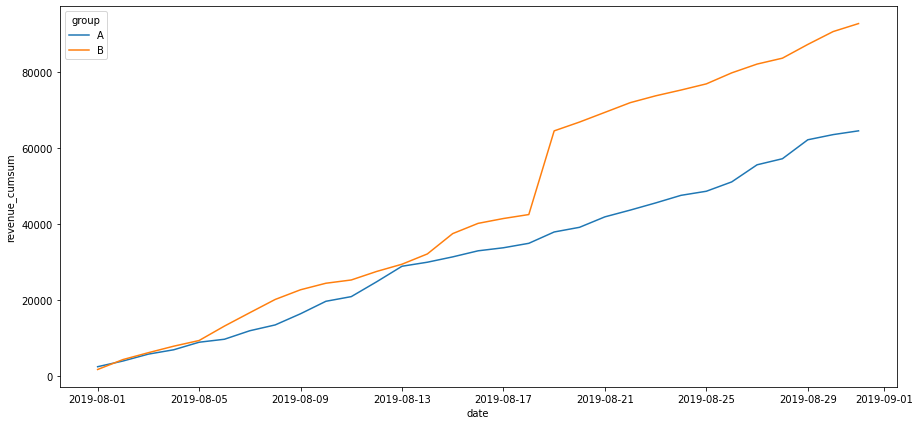

In [40]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_cumulative, x='date', y='revenue_cumsum', hue='group')

**findings:**

- dari lineplot yang ditunjukkan diatas, awalnya group `A` dan `B` berada pada garis yang sama. setelah tanggal `2019-08-05`, pendapatan kumulatif pada group `B` selalu lebih besar daripada group `A`

### Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.

In [41]:
df_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845
...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736


In [42]:
df_cumulative['order_size_cumsum'] = df_cumulative['revenue_cumsum'] / df_cumulative['transaction_id_cumsum']

<AxesSubplot:xlabel='date', ylabel='order_size_cumsum'>

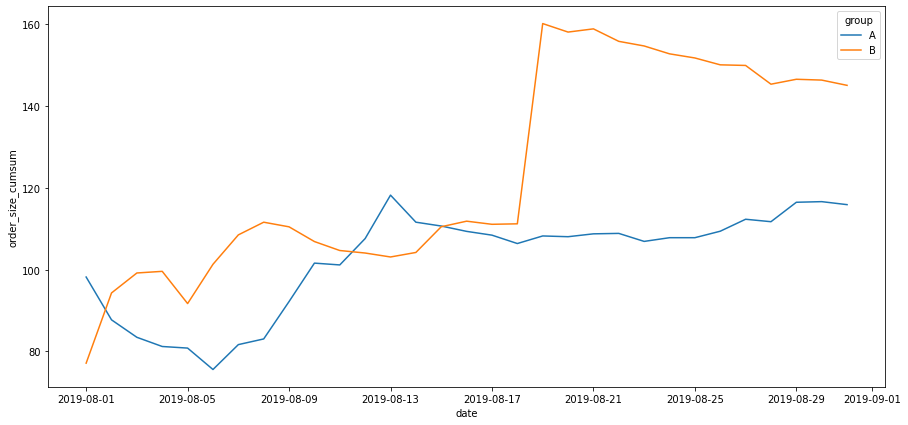

In [43]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_cumulative, x='date', y='order_size_cumsum', hue='group')

**findings:**

- berdasar lineplot diatas, order size pada group `A` dan `B` sempat saling berganti posisi.
- pada awal nya order size pada group `A`  sempat mengalami penurunan terus hingga pasca `2019-08-05` baru terjadi kenaikan
- order size pada group `B` sempat mengalami naik turun sampai pada `2019-08-17` dimana terjadi kenaikan yang cukup tajam pada order size group `B` 

### Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buatlah kesimpulan dan asumsinya.

In [44]:
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235


In [45]:
df_cumulative_a = df_cumulative[df_cumulative['group']=='A'].reset_index(drop=True)
df_cumulative_b = df_cumulative[df_cumulative['group']=='B'].reset_index(drop=True)

In [46]:
merge_cumulative = df_cumulative_a.merge(df_cumulative_b,
                                        left_on='date',
                                        right_on='date',
                                        how='left',
                                        suffixes=['A','B'])

In [47]:
merge_cumulative.head()

,date,groupA,revenueA,transaction_idA,visitor_idA,visitsA,revenue_cumsumA,transaction_id_cumsumA,visitor_id_cumsumA,visits_cumsumA,...,groupB,revenueB,transaction_idB,visitor_idB,visitsB,revenue_cumsumB,transaction_id_cumsumB,visitor_id_cumsumB,visits_cumsumB,order_size_cumsumB
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,...,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
1,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,...,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
2,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,...,B,1806.8,16,16,509,6050.6,61,59,1803,99.190164
3,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,...,B,1717.3,17,16,770,7767.9,78,75,2573,99.588462
4,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,...,B,1495.0,23,23,707,9262.9,101,98,3280,91.711881


In [48]:
merge_cumulative['relative_order_size'] = merge_cumulative['order_size_cumsumB'] / merge_cumulative['order_size_cumsumA'] - 1

In [49]:
merge_cumulative.head()

,date,groupA,revenueA,transaction_idA,visitor_idA,visitsA,revenue_cumsumA,transaction_id_cumsumA,visitor_id_cumsumA,visits_cumsumA,...,revenueB,transaction_idB,visitor_idB,visitsB,revenue_cumsumB,transaction_id_cumsumB,visitor_id_cumsumB,visits_cumsumB,order_size_cumsumB,relative_order_size
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,...,1620.0,21,20,713,1620.0,21,20,713,77.142857,-0.214431
1,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,...,2623.8,24,23,581,4243.8,45,43,1294,94.306667,0.074915
2,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,...,1806.8,16,16,509,6050.6,61,59,1803,99.190164,0.188429
3,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,...,1717.3,17,16,770,7767.9,78,75,2573,99.588462,0.226225
4,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,...,1495.0,23,23,707,9262.9,101,98,3280,91.711881,0.134662


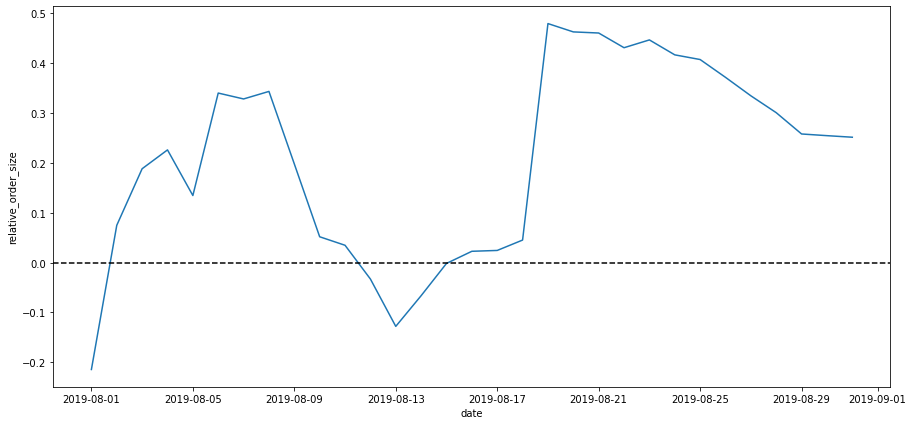

In [50]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=merge_cumulative, x='date', y='relative_order_size')
plt.axhline(y=0, color='black', linestyle='--')

**findings:**

- ketika nilai `relative_order_size` melebihi angka 0, itu berarti nilai `order_size_cumsumB` lebih besar daripada `order_size_cumsumA`
- jika nilai `relative_order_size` dibawah angka 0, itu berarti nilai `order_size_cumsumA` lebih besar daripada `order_size_cumsumB`
- pada lineplot diatas, mayoritas data nya berada pada angka diatas 0, ini menunjukkan `order_size_cumsumB` lebih besar dari `order_size_cumsumA` pada mayoritas data

### Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buatlah kesimpulan dan asumsinya.

In [51]:
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235


In [52]:
df_cumulative['conversion_cumsum'] = df_cumulative['transaction_id_cumsum'] / df_cumulative['visits_cumsum'] * 100

<AxesSubplot:xlabel='date', ylabel='conversion_cumsum'>

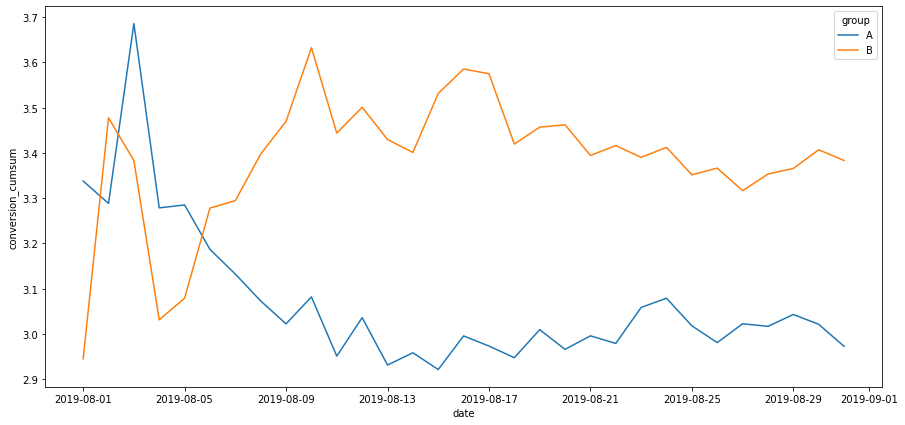

In [53]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_cumulative, x='date', y='conversion_cumsum', hue='group')

**findings:**

- berdasarkan lineplot diatas, conversion rate tertinggi awalnya dipegang oleh group `A`. tetapi setelah `2019-08-05`, conversion rate tertinggi selalu dipegang oleh group `B`

### Buatlah diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buatlah kesimpulan dan asumsinya.

In [54]:
df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [55]:
visitor_agg = df_orders.groupby(['visitor_id']).agg({
    'transaction_id':'nunique'
}).reset_index()

In [56]:
visitor_agg = visitor_agg.reset_index()

In [57]:
visitor_agg

,index,visitor_id,transaction_id
0,0,5114589,1
1,1,6958315,1
2,2,8300375,2
3,3,11685486,1
4,4,39475350,1
...,...,...,...
1026,1026,4266935830,2
1027,1027,4278982564,1
1028,1028,4279090005,1
1029,1029,4281247801,1


<AxesSubplot:xlabel='index', ylabel='transaction_id'>

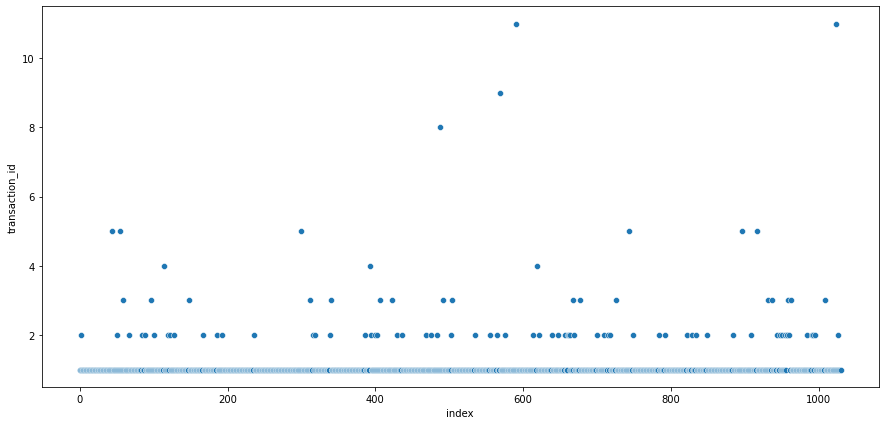

In [58]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=visitor_agg, x='index', y='transaction_id')

**findings:**

- kebanyakan transaksi ada pada angka `1`, artinya transaksi yang dilakukan lebih dari 1 pada tiap `visitor_id` tidak banyak

### Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [59]:
np.percentile(visitor_agg['transaction_id'], [95, 99])

array([2., 4.])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transaction_id'>

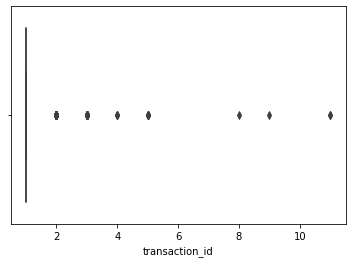

In [60]:
sns.boxplot(visitor_agg['transaction_id'])

**findings:**

- hasil yang dihitung untuk jumlah pesanan per pengguna pada `95th percentile` adalah pada angka `2.`. artinya, jumlah transaksi pada angka 2 dan diatasnya bisa dibilang sebagai anomali atau outliers jika kita menggunakan tingkat signifikansi `5%`.
- hasil yang dihitung untuk jumlah pesanan per pengguna pada `99th percentile` adalah pada angka `4.`. artinya, jumlah transaksi pada angka 4 dan diatasnya bisa dibilang sebagai anomali atau outliersjika kita menggunakan tingkat signifikansi `1%`.

### Buatlah diagram tebar (scatter chart) untuk harga pesanan. Buatlah kesimpulan dan asumsinya.

In [61]:
df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [62]:
df_orders_scatter = df_orders.reset_index()

In [63]:
df_orders_scatter.head()

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B


<AxesSubplot:xlabel='index', ylabel='revenue'>

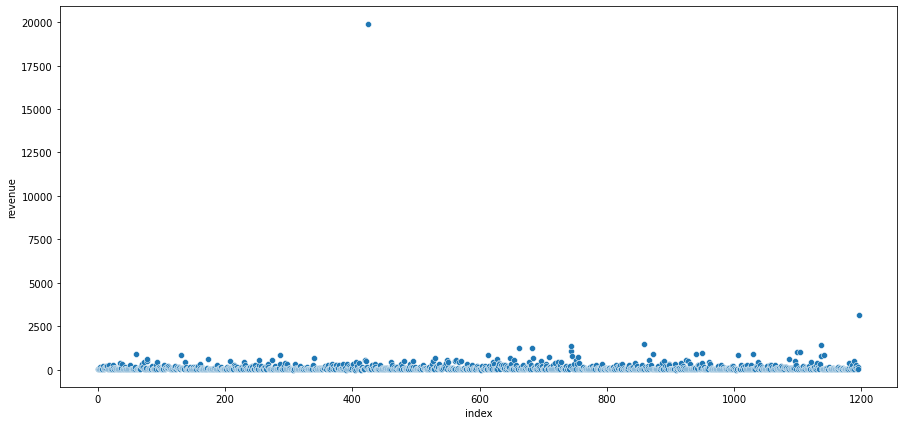

In [64]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_orders_scatter, x='index', y='revenue')

(0.0, 1210.0, 0.0, 2000.0)

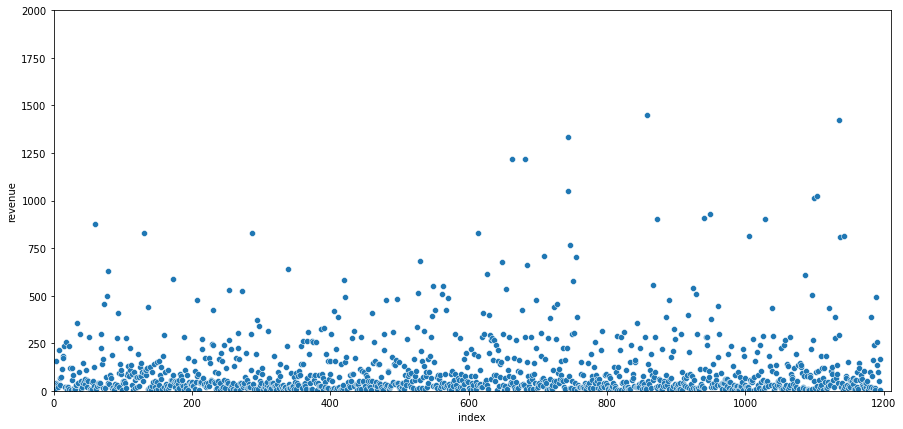

In [65]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_orders_scatter, x='index', y='revenue')
plt.axis([0, 1210, 0, 2000])

In [66]:
df_orders_scatter['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

### Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [67]:
np.percentile(df_orders_scatter['revenue'], [95, 99])

array([435.54 , 900.904])

**findings:**

- hasil yang dihitung untuk harga pesanan pada `95th percentile` adalah pada angka `435.54`. artinya, jumlah transaksi pada angka tersebut dan diatasnya bisa dibilang sebagai anomali atau outliers jika kita menggunakan tingkat signifikansi `5%`.
- hasil yang dihitung untuk harga pesanan pada `99th percentile` adalah pada angka `900.904`. artinya, jumlah transaksi pada angka tersebut dan diatasnya bisa dibilang sebagai anomali atau outliers jika kita menggunakan tingkat signifikansi `1%`.

### Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.

In [68]:
orders_a = df_orders_scatter[df_orders_scatter['group']=='A'].groupby('visitor_id').agg({
    'transaction_id':'nunique'
}).reset_index()

orders_b = df_orders_scatter[df_orders_scatter['group']=='B'].groupby('visitor_id').agg({
    'transaction_id':'nunique'
}).reset_index()

In [69]:
orders_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [70]:
orders_b

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [71]:
df_visits[df_visits['group']=='A']['visits'].sum()

18736

In [72]:
df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_a['transaction_id'])

18233

In [73]:
sample_a = pd.concat([orders_a['transaction_id'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_a['transaction_id'])), name='orders')],axis=0)

sample_b = pd.concat([orders_b['transaction_id'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_b['transaction_id'])), name='orders')],axis=0)

In [74]:
sample_a.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
dtype: int64

In [75]:
sample_b.value_counts()

0    18330
1      552
2       23
3        5
4        4
5        1
6        1
dtype: int64

**Hipotesis**

**HO** = data A dan B secara statistik **SAMA**

**H1** = data A dan B secara statistik **TIDAK SAMA**

In [76]:
alpha = 0.05

results_1 = stats.mannwhitneyu(sample_a, sample_b)
print('p-value: ', results_1.pvalue)

if (results_1.pvalue < alpha):
    print('Hipotesis nol ditolak: ada perbedaan secara statistik pada data a dan b')
else:
    print('Gagal menolak hipotesis nol: tidak bisa menemukan perbedaan secara statistik pada data a dan b')

p-value:  0.016792355056752608
Hipotesis nol ditolak: ada perbedaan secara statistik pada data a dan b


### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.

In [77]:
sample_a_2 = df_orders_scatter[df_orders_scatter['group']=='A']['revenue']
sample_b_2 = df_orders_scatter[df_orders_scatter['group']=='B']['revenue']

**Hipotesis**

**HO** = data A dan B secara statistik **SAMA**

**H1** = data A dan B secara statistik **TIDAK SAMA**

In [78]:
alpha = 0.05

results_2 = stats.mannwhitneyu(sample_a_2, sample_b_2)
print('p-value: ', results_2.pvalue)

if (results_2.pvalue < alpha):
    print('Hipotesis nol ditolak: ada perbedaan secara statistik pada data a dan b')
else:
    print('Gagal menolak hipotesis nol: tidak bisa menemukan perbedaan secara statistik pada data a dan b')

p-value:  0.6915246773264736
Gagal menolak hipotesis nol: tidak bisa menemukan perbedaan secara statistik pada data a dan b


### Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.

In [79]:
users_with_many_orders = pd.concat([orders_a[orders_a['transaction_id'] > 2]['visitor_id'],
                                  orders_b[orders_b['transaction_id'] > 2]['visitor_id']], axis= 0)

In [80]:
users_with_expensive_orders = df_orders_scatter[df_orders_scatter['revenue'] > 435]['visitor_id']

In [81]:
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders],
                          axis=0).drop_duplicates().sort_values()

In [82]:
len(abnormal_users)

75

In [83]:
sample_a_3 = pd.concat([orders_a[~(orders_a['visitor_id'].isin(abnormal_users))]['transaction_id'],
                        pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_a['transaction_id'])), name='orders')],
                       axis=0)

sample_b_3 = pd.concat([orders_b[~(orders_b['visitor_id'].isin(abnormal_users))]['transaction_id'],
                        pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_b['transaction_id'])), name='orders')],
                       axis=0)

In [84]:
alpha = 0.05

results_3 = stats.mannwhitneyu(sample_a_3, sample_b_3)
print('p-value: ', results_3.pvalue)

if (results_3.pvalue < alpha):
    print('Hipotesis nol ditolak: ada perbedaan secara statistik pada data a dan b')
else:
    print('Gagal menolak hipotesis nol: tidak bisa menemukan perbedaan secara statistik pada data a dan b')

p-value:  0.01417823754717904
Hipotesis nol ditolak: ada perbedaan secara statistik pada data a dan b


### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.

In [85]:
sample_a_4 = df_orders_scatter[(df_orders_scatter['group']=='A') & ~(orders_a['visitor_id'].isin(abnormal_users))]['revenue']
sample_b_4 = df_orders_scatter[(df_orders_scatter['group']=='B') & (orders_a['visitor_id'].isin(abnormal_users))]['revenue']

In [86]:
alpha = 0.05

results_4 = stats.mannwhitneyu(sample_a_4, sample_b_4)
print('p-value: ', results_4.pvalue)

if (results_4.pvalue < alpha):
    print('Hipotesis nol ditolak: ada perbedaan secara statistik pada data a dan b')
else:
    print('Gagal menolak hipotesis nol: tidak bisa menemukan perbedaan secara statistik pada data a dan b')

p-value:  0.6257063151882403
Gagal menolak hipotesis nol: tidak bisa menemukan perbedaan secara statistik pada data a dan b


### Buatlah keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 
1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 
2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 
3. Melanjutkan pengujian.

setelah uji signifikansi statistik menggunakan Mann-Whitney U test, **ditemukan** beberapa hal berikut:

- untuk `perbedaan konversi` antar kelompok `A` dan `B`, ditemukan perbedaan secara statistik pada kedua kelompok tersebut dengan kelompok `B` yang memiliki hasil yang lebih bagus/dominan. perbedaan secara statistik tersebut bisa ditemukan pada data mentah dan data yang telah difilter.
- untuk `perbedaan ukuran pesanan` antar kelompok `A` dan `B`, tidak ditemukan perbedaan secara statistik pada kedua kelompok tersebut. hanya saja, kelompok `B` yang memiliki hasil yang lebih bagus/dominan jika dilihat pada lineplot sebelumnya. tidak ditemukannya perbedaan secara statistik tersebut bisa ditemukan pada data mentah dan data yang telah difilter.

**Kesimpulan:**

- saya menyimpulkan untuk **menghentikan pengujian**, dengan mempertimbangkan kelompok `B` sebagai yang lebih unggul.
- walaupun ada beberapa variabel yang ditemukan tidak memiliki perbedaan statistik secara signifikan antara kelompok `A` dan `B`. menurut saya tidak perlu dilakukan pengujian lagi karena hampir semua variabel seperti `pendapatan kumulatif`, `ukuran pesanan`, dan `tingkat konversi` menunjukkan bahwa kelompok `B` adalah kelompok yang lebih unggul.